In [142]:
import re
import pandas as pd
import seaborn as sns
from jcopml.plot import plot_missing_value
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100

# Import Data

In [143]:
df = pd.read_csv(
    "./data/investments_VC.csv", 
    encoding= "ISO-8859-1",
    parse_dates= ["founded_at", "first_funding_at", "last_funding_at"],
)
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2.0,nan,NaN,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# EDA Basic Info

In [100]:
df.info(verbose=True, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
permalink               49438 non-null object
name                    49437 non-null object
homepage_url            45989 non-null object
category_list           45477 non-null object
 market                 45470 non-null object
 funding_total_usd      49438 non-null object
status                  48124 non-null object
country_code            44165 non-null object
state_code              30161 non-null object
region                  44165 non-null object
city                    43322 non-null object
funding_rounds          49438 non-null float64
founded_at              54294 non-null object
founded_month           38482 non-null object
founded_quarter         38482 non-null object
founded_year            38482 non-null float64
first_funding_at        54294 non-null object
last_funding_at         54294 non-null object
seed                    49438 non-null float64
venture       

# Missing Value Info

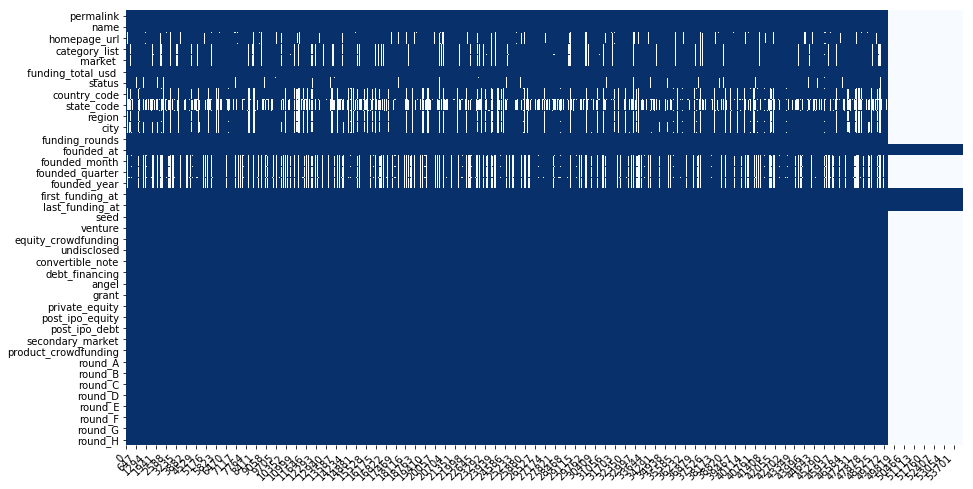

In [101]:
plot_missing_value(df)

In [102]:
(df.isna().sum() / len(df)) * 100

permalink                8.943898
name                     8.945740
homepage_url            15.296350
category_list           16.239363
 market                 16.252256
 funding_total_usd       8.943898
status                  11.364055
country_code            18.655837
state_code              44.448742
region                  18.655837
city                    20.208494
funding_rounds           8.943898
founded_at               0.000000
founded_month           29.122923
founded_quarter         29.122923
founded_year            29.122923
first_funding_at         0.000000
last_funding_at          0.000000
seed                     8.943898
venture                  8.943898
equity_crowdfunding      8.943898
undisclosed              8.943898
convertible_note         8.943898
debt_financing           8.943898
angel                    8.943898
grant                    8.943898
private_equity           8.943898
post_ipo_equity          8.943898
post_ipo_debt            8.943898
secondary_mark

# Fixed Weird Rows / Cols name

In [151]:
df[" funding_total_usd "].tail(15)[49423]

' -   '

In [153]:
def convert_str2float(fund: str) -> float:
    try:
        return float("".join(re.findall("\d+", fund)))
    except:
        return np.nan

df["market"] = df[" market "]
df["funding_total_usd"] = df[" funding_total_usd "]

df["funding_total_usd"] = df["funding_total_usd"].apply(lambda x: convert_str2float(x))
df.dropna(subset= [" funding_total_usd "], inplace=True)
df.drop(columns=[" market ", " funding_total_usd "], inplace=True)

# Popular Market & Country

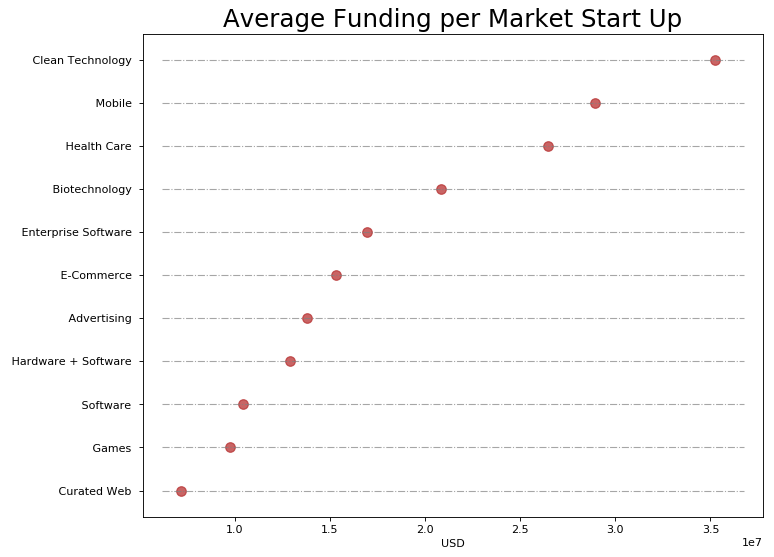

In [202]:
# Prepare Data
df_raw = df.copy()

df_raw = df_raw[df_raw["market"].isin(dict(df_raw.market.value_counts()[:11]).keys())]
df_raw = df_raw[['funding_total_usd', 'market']].groupby('market').apply(lambda x: x.mean())
df_raw.sort_values('funding_total_usd', inplace=True)
df_raw.reset_index(inplace=True)

min_fund = df_raw.funding_total_usd.min()
max_fund = df_raw.funding_total_usd.max()

# # Draw plot
fig, ax = plt.subplots(figsize=(10,8), dpi= 80)
ax.hlines(y=df_raw.index, xmin=min_fund - 1000000, xmax=max_fund + 1500000, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(
    y=df_raw.index, 
    x=df_raw.funding_total_usd, 
    s=75, 
    color='firebrick', 
    alpha=0.7
)

# # Title, Label, Ticks and Ylim
ax.set_title('Average Funding per Market Start Up', fontdict={'size':22})
ax.set_xlabel('USD')
ax.set_yticks(df_raw.index)
ax.set_yticklabels(df_raw.market.str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(min_fund - 2000000, max_fund + 2500000);

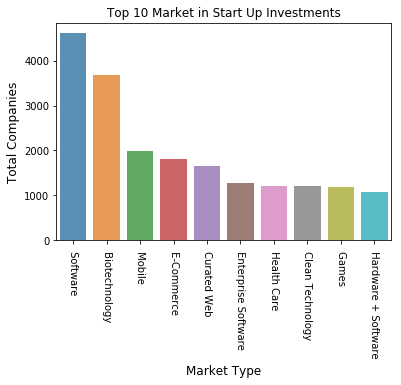

In [107]:
market_count  = df['market'].value_counts()
market_count = market_count[:10,]

market_plot = sns.barplot(
    market_count.index, 
    market_count.values, 
    alpha=0.8,
)

for item in market_plot.get_xticklabels():
    item.set_rotation(-90)
    
plt.title('Top 10 Market in Start Up Investments')
plt.ylabel('Total Companies', fontsize=12)
plt.xlabel('Market Type', fontsize=12)
plt.show()

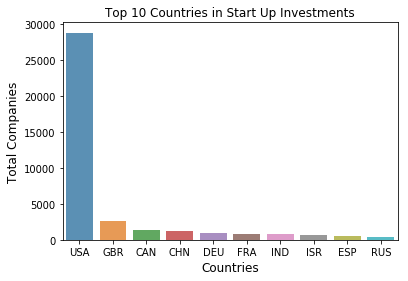

In [108]:
country_count  = df['country_code'].value_counts()
country_count = country_count[:10,]

country_plot = sns.barplot(
    country_count.index, 
    country_count.values, 
    alpha=0.8,
)
    
plt.title('Top 10 Countries in Start Up Investments')
plt.ylabel('Total Companies', fontsize=12)
plt.xlabel('Countries', fontsize=12)
plt.show()

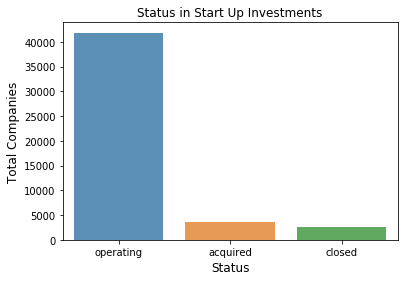

In [110]:
status_count  = df['status'].value_counts()
status_count = status_count[:10,]

status_plot = sns.barplot(
    status_count.index, 
    status_count.values, 
    alpha=0.8,
)
    
plt.title('Status in Start Up Investments')
plt.ylabel('Total Companies', fontsize=12)
plt.xlabel('Status', fontsize=12)
plt.show()